In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pystan
from matplotlib import rc
from numpy.linalg import inv 
from sklearn import linear_model 

rc('text', usetex=True)

pd.set_option('display.max_columns', 100)

aa2codon = {                                                         # DNA codon table
    'A' : ['GCT', 'GCC', 'GCA', 'GCG'],
    'R' : ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'N' : ['AAT', 'AAC'],
    'D' : ['GAT', 'GAC'],
    'C' : ['TGT', 'TGC'],
    'E' : ['GAA', 'GAG'],
    'Q' : ['CAA', 'CAG'],
    'G' : ['GGT', 'GGC', 'GGA', 'GGG'],
    'H' : ['CAT', 'CAC'],
    'I' : ['ATT', 'ATC', 'ATA'],
    'L' : ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    'K' : ['AAA', 'AAG'],
    'M' : ['ATG'],
    'F' : ['TTT', 'TTC'],
    'P' : ['CCT', 'CCC', 'CCA', 'CCG'],
    'S' : ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
    'T' : ['ACT', 'ACC', 'ACA', 'ACG'],
    'W' : ['TGG'],
    'Y' : ['TAT', 'TAC'],
    'V' : ['GTT', 'GTC', 'GTA', 'GTG'],
    '*' : ['TAA', 'TGA', 'TAG'],
    '-' : ['---'],
    }
#BG505 mutDNA1
init_pop = pd.read_csv("./output/simulation/init_sampling.csv")
codon_list = init_pop.columns[2:]
key_list = list(aa2codon.keys())
val_list = list(aa2codon.values())
WT_seq = []
for i in range(init_pop.shape[0]):
    list_of_keys = [key for key, list_of_values in aa2codon.items() if init_pop['wildtype'].tolist()[i] in list_of_values][0]
    WT_seq.append(list_of_keys)

df_col = []
for i in range(len(codon_list)):
    list_of_keys = [key for key, list_of_values in aa2codon.items() if codon_list[i] in list_of_values][0]
    df_col.append(list_of_keys)
    
df_seperate = []
for i in range(len(codon_list)):
    df_seperate.append(init_pop[['site', 'wildtype', codon_list[i]]])

for i in range(len(codon_list)):
    df_seperate[i] = df_seperate[i].rename(columns = {df_seperate[i].columns[2]: [key for key, list_of_values in aa2codon.items() if df_seperate[i].columns[2] in list_of_values][0]})
    temp_list = []
    for j in range(init_pop.shape[0]):
        temp_list.append(df_seperate[i].columns[2])
    df_seperate[i]['AA'] = temp_list
    
df_AA = df_seperate[0].copy()
for i in range(len(codon_list)-1):
    df_AA = pd.concat([df_AA, df_seperate[i+1]]).groupby(['site', 'wildtype', 'AA']).sum().reset_index()
df_AA = df_AA.groupby(['site', 'wildtype']).sum().reset_index()

total_count = df_AA[df_AA.columns[2:]].T.sum().tolist()
df_AA['total_counts'] = total_count

df_temp = df_AA.copy()
df_temp = df_temp.drop('total_counts', axis=1)
AA_list = df_temp.columns[2:]
df_distribution = df_temp[AA_list]
df_distribution = df_distribution.T
arr = df_distribution.values
arr.sort(axis=0)
arr = arr[::-1]

df_distribution = pd.DataFrame(arr, columns=df_distribution.columns)
df_distribution

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669
0,436363.0,437064.0,436469.0,437013.0,436983.0,436644.0,436768.0,436802.0,436286.0,437163.0,436833.0,436958.0,436212.0,436937.0,436565.0,436939.0,436773.0,435964.0,436779.0,436707.0,437358.0,436968.0,437294.0,437148.0,435829.0,436756.0,437266.0,436274.0,437747.0,436814.0,437155.0,435542.0,436515.0,436466.0,435281.0,436274.0,436366.0,421341.0,431323.0,433637.0,435091.0,433659.0,403742.0,415302.0,406736.0,413296.0,418489.0,350903.0,409586.0,416254.0,...,210561.0,209522.0,218191.0,214592.0,217988.0,216522.0,202751.0,200563.0,197799.0,190110.0,200160.0,129952.0,96157.0,131661.0,151361.0,166282.0,162639.0,189208.0,209711.0,211814.0,213893.0,211767.0,215793.0,219257.0,222014.0,222111.0,210061.0,213342.0,203625.0,223728.0,223085.0,222166.0,222981.0,222238.0,223187.0,221346.0,223653.0,222840.0,221726.0,223711.0,223564.0,223476.0,223653.0,223516.0,223699.0,223628.0,223997.0,223552.0,223703.0,223943.0
1,259.0,221.0,147.0,141.0,179.0,175.0,145.0,154.0,293.0,127.0,114.0,188.0,218.0,147.0,299.0,118.0,113.0,389.0,169.0,72.0,61.0,122.0,69.0,80.0,501.0,187.0,57.0,196.0,15.0,125.0,62.0,130.0,100.0,133.0,89.0,91.0,60.0,102.0,111.0,104.0,158.0,91.0,142.0,357.0,149.0,201.0,105.0,81.0,59.0,134.0,...,332.0,77.0,362.0,91.0,70.0,133.0,87.0,49.0,40.0,139.0,63.0,107.0,84.0,66.0,202.0,39.0,121.0,101.0,81.0,96.0,30.0,42.0,78.0,54.0,39.0,70.0,23.0,27.0,21.0,16.0,29.0,59.0,50.0,50.0,38.0,73.0,23.0,25.0,39.0,81.0,55.0,70.0,63.0,63.0,64.0,48.0,36.0,166.0,41.0,51.0
2,147.0,91.0,87.0,99.0,160.0,161.0,128.0,109.0,148.0,126.0,102.0,116.0,142.0,110.0,152.0,97.0,106.0,129.0,131.0,71.0,59.0,71.0,67.0,72.0,330.0,85.0,52.0,85.0,11.0,107.0,58.0,105.0,63.0,128.0,81.0,75.0,53.0,64.0,91.0,89.0,55.0,73.0,110.0,119.0,110.0,95.0,98.0,64.0,57.0,86.0,...,119.0,75.0,52.0,44.0,70.0,62.0,48.0,46.0,38.0,89.0,51.0,43.0,72.0,54.0,94.0,38.0,50.0,64.0,55.0,95.0,30.0,29.0,35.0,48.0,35.0,37.0,22.0,24.0,15.0,12.0,24.0,49.0,44.0,40.0,37.0,35.0,16.0,23.0,35.0,35.0,54.0,42.0,60.0,54.0,57.0,46.0,32.0,46.0,33.0,45.0
3,100.0,82.0,79.0,80.0,80.0,96.0,120.0,104.0,141.0,93.0,89.0,114.0,136.0,74.0,97.0,54.0,99.0,109.0,94.0,71.0,56.0,68.0,61.0,61.0,99.0,68.0,44.0,54.0,8.0,81.0,44.0,87.0,49.0,66.0,63.0,46.0,48.0,52.0,68.0,77.0,52.0,58.0,66.0,52.0,54.0,90.0,97.0,60.0,53.0,79.0,...,45.0,65.0,42.0,39.0,67.0,57.0,37.0,32.0,37.0,47.0,49.0,26.0,21.0,47.0,42.0,37.0,42.0,46.0,49.0,80.0,19.0,25.0,34.0,46.0,34.0,30.0,15.0,19.0,10.0,9.0,20.0,47.0,36.0,32.0,34.0,35.0,16.0,18.0,28.0,31.0,43.0,41.0,49.0,50.0,46.0,44.0,28.0,38.0,29.0,41.0
4,97.0,76.0,78.0,48.0,62.0,90.0,85.0,70.0,109.0,62.0,78.0,68.0,111.0,62.0,89.0,50.0,91.0,77.0,63.0,70.0,54.0,51.0,40.0,46.0,57.0,59.0,39.0,51.0,8.0,70.0,29.0,29.0,46.0,57.0,48.0,33.0,27.0,51.0,41.0,65.0,49.0,43.0,57.0,44.0,50.0,76.0,95.0,45.0,40.0,79.0,...,39.0,59.0,39.0,33.0,38.0,53.0,31.0,31.0,34.0,41.0,45.0,23.0,20.0,45.0,41.0,36.0,40.0,37.0,47.0,64.0,16.0,16.0,31.0,35.0,31.0,24.0,12.0,13.0,6.0,9.0,19.0,36.0,26.0,30.0,26.0,19.0,13.0,17.0,22.0,29.0,42.0,38.0,46.0,47.0,46.0,42.0,28.0,33.0,25.0,33.0
5,75.0,64.0,76.0,42.0,57.0,82.0,82.0,69.0,96.0,54.0,72.0,66.0,100.0,61.0,75.0,42.0,89.0,67.0,60.0,69.0,53.0,47.0,38.0,45.0,51.0,59.0,36.0,38.0,6.0,65.0,26.0,28.0,44.0,54.0,46.0,29.0,25.0,48.0,39.0,56.0,42.0,42.0,19.0,42.0,48.0,55.0,90.0,33.0,11.0,69.0,...,39.0,51.0,38.0,30.0,35.0,37.0,30.0,31.0,33.0,39.0,38.0,19.0,19.0,36.0,38.0,34.0,38.0,35.0,42.0,48.0,12.0,16.0,26.0,34.0,28.0,22.0,11.0,12.0,6.0,9.0,19.0,32.0,20.0,23.0,22.0,18.0,11.0,16.0,17.0,25.0,36.0,31.0,37.0,40.0,44.0,41.0,26.0,25.0,24.0,30.0
6,71.0,58.0,68.0,41.0,40.0,79.0,70.0,69.0,82.0,53.0,70.0,59.0,85.0,54.0,52.0,40.0,74.0,67.0,59.0,62.0,47.0,43.0,35.0,40.0,45.0,43.0,36.0,29.0,5.0,50.

In [2]:
model = """
data {
    int N;
    int K;
    int y[N,K];
}

parameters {
    simplex[K] theta;
}

model {
    for (i in 1:N) {
        y[i,] ~ multinomial(theta);
    } 
}
"""
multinomial = pystan.StanModel(model_code=model)

# true frequency distribution

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_78a200dd4b762d3294f98602e987e4aa NOW.


In [3]:
np.random.seed(0)
df_distribution_ = df_distribution.astype('int32')
df_multinomial = df_distribution_.T
data = df_multinomial.to_numpy()
input_data = {'N': len(data), 'K': len(data[0]), 'y': data}
fit = multinomial.sampling(data=input_data, iter=1000, chains=4, warmup=500, thin=1, seed=101)
print(fit)

np.random.seed(0)
random_sampling = np.random.randint(2000, size=20)
frequency_list = []
for i in range(len(random_sampling)):
    frequency_list.append([])
    for j in range(21):
        frequency_list[i].append(fit['theta['+str(j+1)+']'][i])

df_sampling = pd.DataFrame.from_records(frequency_list)
df_sampling

Inference for Stan model: anon_model_78a200dd4b762d3294f98602e987e4aa.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1]     1.0  6.8e-8 3.2e-6    1.0    1.0    1.0    1.0    1.0   2185    1.0
theta[2]  3.6e-4  2.6e-8 1.4e-6 3.6e-4 3.6e-4 3.6e-4 3.7e-4 3.7e-4   2806    1.0
theta[3]  2.2e-4  2.0e-8 1.1e-6 2.2e-4 2.2e-4 2.2e-4 2.3e-4 2.3e-4   2979    1.0
theta[4]  1.8e-4  1.7e-8 9.6e-7 1.8e-4 1.8e-4 1.8e-4 1.8e-4 1.8e-4   3063    1.0
theta[5]  1.5e-4  1.5e-8 8.8e-7 1.5e-4 1.5e-4 1.5e-4 1.5e-4 1.5e-4   3554    1.0
theta[6]  1.4e-4  1.4e-8 8.4e-7 1.3e-4 1.4e-4 1.4e-4 1.4e-4 1.4e-4   3489    1.0
theta[7]  1.2e-4  1.5e-8 7.8e-7 1.2e-4 1.2e-4 1.2e-4 1.2e-4 1.2e-4   2628    1.0
theta[8]  1.1e-4  1.3e-8 7.6e-7 1.1e-4 1.1e-4 1.1e-4 1.1e-4 1.1e-4   3200    1.0
theta[9]  9.8e-5  1.3e-8 7.1e-7 9.7e-5 9.8e-5 9.8e-5 9.9e-510.0e-5   2974    1.0
the

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.998004,0.000364,0.000226,0.000179,0.000154,0.000136,0.000121,0.000110,0.000099,0.000087,0.000077,0.000070,0.000063,0.000058,0.000052,0.000047,0.000043,0.000038,0.000032,0.000026,0.000017
1,0.998005,0.000365,0.000224,0.000179,0.000153,0.000135,0.000122,0.000111,0.000098,0.000088,0.000077,0.000069,0.000062,0.000058,0.000053,0.000047,0.000042,0.000038,0.000032,0.000025,0.000017
2,0.998006,0.000368,0.000223,0.000177,0.000154,0.000136,0.000121,0.000111,0.000099,0.000087,0.000077,0.000069,0.000063,0.000057,0.000052,0.000047,0.000042,0.000038,0.000032,0.000026,0.000017
3,0.998003,0.000363,0.000225,0.000177,0.000155,0.000136,0.000122,0.000111,0.000098,0.000087,0.000077,0.000070,0.000063,0.000057,0.000053,0.000047,0.000042,0.000038,0.000032,0.000025,0.000017
4,0.998011,0.000363,0.000223,0.000179,0.000152,0.000137,0.000122,0.000109,0.000097,0.000086,0.000077,0.000069,0.000063,0.000058,0.000053,0.000046,0.000042,0.000037,0.000032,0.000025,0.000017
5,0.998003,0.000364,0.000224,0.000178,0.000154,0.000136,0.000123,0.000111,0.000098,0.000087,0.000077,0.000070,0.000063,0.000058,0.000052,0.000047,0.000043,0.000037,0.000032,0.000025,0.000018
6,0.998008,0.000364,0.000223,0.000176,0.000153,0.000135,0.000122,0.000111,0.000099,0.000086,0.000079,0.000070,0.000062,0.000057,0.000052,0.000048,0.000041,0.000037,0.000032,0.000025,0.000017
7,0.998005,0.000363,0.000223,0.000178,0.000154,0.000136,0.000123,0.000111,0.000098,0.000086,0.000077,0.000071,0.000063,0.000057,0.000052,0.000047,0.000042,0.000038,0.000032,0.000025,0.000017
8,0.998007,0.000365,0.000224,0.000177,0.000151,0.000135,0.000123,0.000111,0.000099,0.000086,0.000077,0.000070,0.000063,0.000058,0.000052,0.000047,0.000042,0.000037,0.000032,0.000025,0.000017
9,0.998005,0.000365,0.000225,0.000179,0.000151,0.000135,0.000124,0.000109,0.000097,0.000088,0.000078,0.000069,0.000062,0.000056,0.000053,0.000048,0.000042,0.000037,0.000032,0.000026,0.000018


In [4]:
# each entry of dataframe is one genotype/allele
np.random.seed(0)
df_selection = df_AA.copy().drop(['site','wildtype', 'total_counts'], axis=1)
columns = df_selection.columns
for index, row in df_selection.iterrows():
   # print(row)
    for column in columns:
        df_selection.loc[index, column] = np.random.normal(0.0, 0.1, 1)[0]
df_selection

#fix seed

,K,N,T,R,S,I,M,Q,H,P,L,E,D,A,G,V,*,Y,C,W,F
0,0.176405,0.040016,0.097874,0.224089,0.186756,-0.097728,0.095009,-0.015136,-0.010322,0.041060,0.014404,0.145427,0.076104,0.012168,0.044386,0.033367,0.149408,-0.020516,0.031307,-0.085410,-0.255299
1,0.065362,0.086444,-0.074217,0.226975,-0.145437,0.004576,-0.018718,0.153278,0.146936,0.015495,0.037816,-0.088779,-0.198080,-0.034791,0.015635,0.123029,0.120238,-0.038733,-0.030230,-0.104855,-0.142002
2,-0.170627,0.195078,-0.050965,-0.043807,-0.125280,0.077749,-0.161390,-0.021274,-0.089547,0.038690,-0.051081,-0.118063,-0.002818,0.042833,0.006652,0.030247,-0.063432,-0.036274,-0.067246,-0.035955,-0.081315
3,-0.172628,0.017743,-0.040178,-0.163020,0.046278,-0.090730,0.005195,0.072909,0.012898,0.113940,-0.123483,0.040234,-0.068481,-0.087080,-0.057885,-0.031155,0.005617,-0.116515,0.090083,0.046566,-0.153624
4,0.148825,0.189589,0.117878,-0.017992,-0.107075,0.105445,-0.040318,0.122245,0.020827,0.097664,0.035637,0.070657,0.001050,0.178587,0.012691,0.040199,0.188315,-0.134776,-0.127048,0.096940,-0.117312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,-0.058381,-0.003250,0.020394,0.033251,0.132713,0.142915,0.161423,-0.025664,0.008917,0.107464,0.006117,0.138730,-0.231020,0.159364,-0.069079,-0.006949,-0.029728,0.083112,-0.017773,0.201848,0.056561
666,-0.020514,0.093294,0.062806,-0.017377,0.124928,0.084395,0.120722,-0.102591,-0.029740,-0.040436,0.084855,0.101054,0.101676,-0.034397,-0.070641,-0.030292,0.146353,0.180025,0.046512,-0.037158,-0.029711
667,0.035719,-0.267841,0.036494,-0.037777,-0.075906,-0.001517,-0.088212,0.059519,-0.008527,0.097502,-0.202646,0.032400,-0.154683,-0.060360,0.127331,-0.051708,0.138863,0.201289,0.068413,0.056427,-0.170783
668,-0.012207,0.080225,0.294022,-0.054400,0.054404,-0.030283,-0.012365,0.107111,0.017116,-0.116770,-0.159486,0.114986,0.170744,-0.179575,-0.031497,0.015683,-0.031149,0.002117,0.018902,0.095553,-0.027450


Optimized regularization term = 1.0e-02
Saving popDMS inference with regularization = 1.0


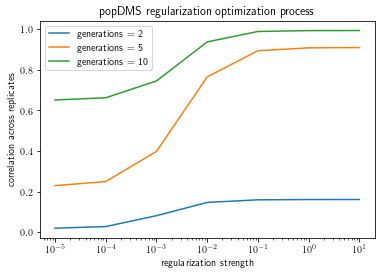

In [13]:
def true_trajectory(population_size, finite_sampling, generation, sample_index):
    np.random.seed(10)
    
    trajectory = pd.DataFrame(columns = df_selection.columns)
    trajectory = trajectory.T
    select_list = df_selection.iloc[6]
    trajectory['selection_coefficients'] = select_list+1
    trajectory[0] = np.random.multinomial(population_size, df_sampling.iloc[sample_index].tolist())
    for i in range(generation):
        trajectory[i+1] = np.random.multinomial(population_size, 
                                                (((trajectory['selection_coefficients'])*trajectory[i])/((trajectory['selection_coefficients'])*trajectory[i]).sum()).values.tolist())

    trajectory_save = trajectory[trajectory.columns[1:]]/population_size
    trajectory_save.to_csv('./output/simulation/WF_simulation.csv')
    
    return trajectory



def regularization_optimization(df_trajectory, replicates, finite_sampling, generation_list, regularization_list):
    
    inferred_selection = {}
    reg_correlation = {}
    for regularization in regularization_list:
        inferred_selection[regularization] = {}
        reg_correlation[regularization] = {}
        for generation in generation_list:
            inferred_selection[regularization][generation] = []
            reg_correlation[regularization][generation] = []
        

    trajectory = df_trajectory[df_trajectory.columns[:df_trajectory.shape[1]]]
    for rep_num in range(replicates):
        
        plot_list_all = trajectory[trajectory.columns[1:]].copy()
        plot_list_all = plot_list_all/plot_list_all[0].sum()
        for i in range(plot_list_all.shape[1]):
            prob = plot_list_all[i].tolist()
            sampling_list = np.random.multinomial(finite_sampling, prob)
            plot_list_all[i] = [(m+1)/(sampling_list.sum()+len(sampling_list)) for m in sampling_list] 
        plot_list_all.to_csv('./output/simulation/WF_finite_sampling/'+'rep-%s.csv.zip' %rep_num, sep = ',', compression = 'zip')
        plot_list_all = plot_list_all.T
        regression_list = plot_list_all.copy().T
        regression_list = np.log(regression_list)
        regression_list = regression_list.T
        regression_list['generation'] = [i for i in range(regression_list.shape[0])]
        plot_list_all['generation'] = [i for i in range(regression_list.shape[0])]
        # frequency change
        
        for generation in generation_list:
            plot_list = plot_list_all.iloc[:generation]
            # frequency change
            freq_table = plot_list.drop('generation', axis=1).copy()

            freq_diff = freq_table.iloc[-1]-freq_table.iloc[0]
            freq_diff = np.array(freq_diff.tolist())

            # covariance/ vector
            cov_matx = np.zeros((21, 21))
            for gen in range(freq_table.shape[0]-1):
                variant_freq = freq_table.iloc[gen].tolist()
                for i in range(21):
                    cov_matx[i,i] += variant_freq[i]*(1-variant_freq[i])
                    for j in range(i+1,21):
                        cov_matx[i,j] -= variant_freq[i]*variant_freq[j]
                        cov_matx[j,i] -= variant_freq[i]*variant_freq[j]
            for regularization in regularization_list:
                selection = inv(cov_matx + np.identity(21)*10**(regularization)).dot(freq_diff)
                inferred_selection[regularization][generation].append(selection)
        
    for generation in generation_list:
        for regularization in regularization_list:
            df_selection = pd.DataFrame(inferred_selection[regularization][generation])
            df_selection.to_csv('./output/simulation/WF_mutational_effects/'+'selection_coefficients_gen-%s_'%(generation)+'sampling-%s'%finite_sampling+'_reg'+str(regularization)+'.csv.zip', sep = ',', index = False, compression = 'zip')

            selection_coefficients_corr = df_selection.T.corr(method='pearson')        
            selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
            reg_correlation[regularization][generation].append(selection_coefficients_corr)

    return reg_correlation



def other_methods(replicates, finite_sampling, generation_list, optimized_regularization):
    inferred_log = {}
    inferred_ratio = {}
    inferred_regression = {}
    inferred_selection = {}
    for generation in generation_list:
        inferred_log[generation] = []
        inferred_ratio[generation] = []
        inferred_regression[generation] = []
        inferred_selection[generation] = []
        

    for rep_num in range(replicates):        
        plot_list_all=pd.read_csv('./output/simulation/WF_finite_sampling/'+'rep-%s.csv.zip' %rep_num, index_col=0)
        plot_list_all = plot_list_all.T
        regression_list = plot_list_all.copy().T
        regression_list = np.log(regression_list)
        regression_list = regression_list.T
        regression_list['generation'] = [i for i in range(regression_list.shape[0])]
        plot_list_all['generation'] = [i for i in range(regression_list.shape[0])]
        # frequency change        
        for generation in generation_list:
            plot_list = plot_list_all.iloc[:generation]
            # frequency change
            freq_table = plot_list.drop('generation', axis=1).copy()

            freq_diff = freq_table.iloc[-1]-freq_table.iloc[0]
            freq_diff = np.array(freq_diff.tolist())

            # covariance/ vector
            cov_matx = np.zeros((21, 21))
            for gen in range(freq_table.shape[0]-1):
                variant_freq = freq_table.iloc[gen].tolist()
                for i in range(21):
                    cov_matx[i,i] += variant_freq[i]*(1-variant_freq[i])
                    for j in range(i+1,21):
                        cov_matx[i,j] -= variant_freq[i]*variant_freq[j]
                        cov_matx[j,i] -= variant_freq[i]*variant_freq[j]
                        
            selection = inv(cov_matx + np.identity(21)*optimized_regularization).dot(freq_diff)
            inferred_selection[generation].append(selection)

            # ratio
            raw = freq_table.iloc[-1]/freq_table.iloc[0]
            inferred_ratio[generation].append([i/sum(raw) for i in raw])

            # log enrich
            inferred_log[generation].append([np.log(i/sum(raw)) for i in raw])

            # log regression
            df_regression = regression_list.iloc[:generation].copy()
            temp_enrich = []
            for i in df_regression.columns[:-1]:
                Y = df_regression[i].values.reshape(-1, 1)
                X = df_regression['generation'].values.reshape(-1, 1)
                temp_enrich.append(linear_model.LinearRegression().fit(X,Y).coef_[0][0])
            inferred_regression[generation].append(temp_enrich)
        
    print("Saving popDMS inference with regularization = %.1f"%optimized_regularization)                   
    for generation in generation_list:
        df_enrichment_regress = pd.DataFrame(inferred_regression[generation])
        df_enrichment_ratio = pd.DataFrame(inferred_ratio[generation])
        df_enrichment_log = pd.DataFrame(inferred_log[generation])
        df_selection = pd.DataFrame(inferred_selection[generation])
        df_enrichment_regress.to_csv('./output/simulation/WF_mutational_effects/'+'log_regression_gen-%s_'%(generation)+'sampling-%s'%finite_sampling+'.csv.zip', sep = ',', index = False, compression = 'zip')
        df_enrichment_ratio.to_csv('./output/simulation/WF_mutational_effects/'+'enrichment_ratio_gen-%s_'%(generation)+'sampling-%s'%finite_sampling+'.csv.zip', sep = ',', index = False, compression = 'zip')
        df_enrichment_log.to_csv('./output/simulation/WF_mutational_effects/'+'enrichment_ratio_log_gen-%s_'%(generation)+'sampling-%s'%finite_sampling+'.csv.zip', sep = ',', index = False, compression = 'zip')
        df_selection.to_csv('./output/simulation/WF_mutational_effects/'+'selection_coefficients_gen-%s_'%(generation)+'sampling-%s'%finite_sampling+'.csv.zip', sep = ',', index = False, compression = 'zip')

def find_best_regularization(reg_list, corr_list, percent):
    min_max_diff = max(corr_list)-min(corr_list)
    max_index = corr_list.index(max(corr_list))
    if abs(corr_list[max_index]-corr_list[-1])<0.01:
        optimized_regularization = reg_list[0]
    else:
        optimized_regularization = reg_list[0]
        for i in range(1,len(reg_list)):
#             print(i,reg_list[i],abs(corr_list[i]-corr_list[i-1]), min_max_diff*percent/100)
            if abs(corr_list[i]-corr_list[i-1])>=min_max_diff*percent/100:
                optimized_regularization = reg_list[i-1]
                break  
    print('Optimized regularization term = %.1e' %optimized_regularization)
    return optimized_regularization 

population_size = 100000000
finite_sampling = 50000
generations = 30
replicates = 100
sample_index = 10
generation_list = [2, 5, 10]
regularization_list = [1, 0, -1, -2, -3, -4, -5]
opt_gen = 5
Drop_percent = 20

df_trajectory = true_trajectory(population_size, finite_sampling, generations, sample_index)
reg_correlation = regularization_optimization(df_trajectory, replicates, finite_sampling, generation_list, regularization_list)

corr_gen = {}
for generation in generation_list:
    corr_gen[generation] = []
    for regularization in regularization_list:
        corr_gen[generation].append(reg_correlation[regularization][generation][0])
    plt.plot([10**regularization for regularization in regularization_list], corr_gen[generation], label='generations = '+str(generation))
    plt.xscale('log')
    plt.xlabel('regularization strength')
    plt.ylabel('correlation across replicates')
    plt.title('popDMS regularization optimization process')
    plt.legend()
reg_list = [10**regularization for regularization in regularization_list]

optimized_regularization = find_best_regularization(reg_list, corr_gen[opt_gen], Drop_percent)  
optimized_regularization = 1
other_methods(replicates, finite_sampling, generation_list, optimized_regularization)


Text(0.5, 1.0, 'Consistency of the methods across 100 replicates')

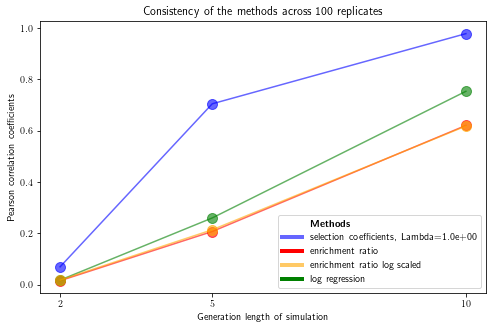

In [14]:
from matplotlib.lines import Line2D

replicates = 100
marker = ['o', 'v', '*']
finite_list=[50000]
plt.figure(figsize=[8,5])
for finite_sampling in finite_list:
    temp = [[],[],[],[],[]]
    for generation in generation_list:

        df_select = pd.read_csv('./output/simulation/WF_mutational_effects/selection_coefficients_gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv.zip', index_col=0)
        df_enrichment_regress = pd.read_csv('./output/simulation/WF_mutational_effects/log_regression_gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv.zip', index_col=0)
        df_enrichment_ratio = pd.read_csv('./output/simulation/WF_mutational_effects/enrichment_ratio_gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv.zip', index_col=0)
        df_enrichment_ratio_log = pd.read_csv('./output/simulation/WF_mutational_effects/enrichment_ratio_log_gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv.zip', index_col=0)

        enrichment_ratio_corr = df_enrichment_ratio.T.corr(method='pearson')
        log_regression_corr = df_enrichment_regress.T.corr(method='pearson')
        selection_coefficients_corr = df_select.T.corr(method='pearson')
        enrichment_ratio_log_corr = df_enrichment_ratio_log.T.corr(method='pearson')
        
        enrichment_ratio_corr = (enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        log_regression_corr = (log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
        enrichment_ratio_log_corr = (enrichment_ratio_log_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        
        temp[0].append(enrichment_ratio_corr)
        temp[1].append(log_regression_corr)
        temp[2].append(selection_coefficients_corr)
        temp[3].append(enrichment_ratio_log_corr)

    plt.plot(generation_list, temp[0], c='red', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.plot(generation_list, temp[1], c='green', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.plot(generation_list, temp[2], c='blue', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)      
    plt.plot(generation_list, temp[3], c='orange', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)      
    plt.xlabel('Generation length of simulation')
    plt.ylabel('Pearson correlation coefficients')
    plt.xticks([2,5,10])
    
legend_elements = [Line2D([0], [0], color='white', lw=0.1, label=r'$\textbf{Methods}$'),
                   Line2D([0], [0], color='blue', lw=4, label='selection coefficients, Lambda=%.1e' %optimized_regularization, alpha=0.6),
                   Line2D([0], [0], color='red', lw=4, label='enrichment ratio'),
                   Line2D([0], [0], color='orange', lw=4, label='enrichment ratio log scaled', alpha=0.6),
                   Line2D([0], [0], color='green', lw=4, label='log regression'),
#                    Line2D([0], [0], color='white', lw=0.1, label=r'$\textbf{Finite sampling size}$'),
#                    Line2D([0], [0], marker='*', color='grey', label='100000', markersize=10),
#                    Line2D([0], [0], marker='v', color='grey', label='50000', markersize=10),
#                    Line2D([0], [0], marker='o', color='grey', label='10000', markersize=10)
                  ]
plt.legend(handles=legend_elements)
plt.title('Consistency of the methods across 100 replicates')
